<h1 align="center">Assignment 2</h1>
<h2 align="center">k-means Clustering</h2>

### Problem Statement:
HELP International has been able to raise $100 million. The CEO wants to use this money strategically and effectively and wants to fund programs in the countries that are most in need of aid. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. In the end, you need to suggest how to allocate the funds among countries.

### About the organization:
HELP International aims to create a network of changemakers and social entrepreneurs who understand the complexities of poverty and play an active role in efforts to improve the quality of life of some of the most vulnerable populations in the world. 

**Group 8:** Gagandeep Singh, Suraj, Simranpreet Singh

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1. Data
Import data into a pandas DataFrame. 

In [2]:
df = pd.read_csv("data/Country-data.csv", )

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Columns
The data has the following columns. 

`country`: Name of the country

`child_mort`: Death of children under 5 years of age per 1000 live births

`exports`: Exports of goods and services per capita. Given as %age of the GDP per capita

`health`: Total health spending per capita. Given as %age of GDP per capita

`imports`: Imports of goods and services per capita. Given as %age of the GDP per capita

`Income`: Net income per person

`Inflation`: The measurement of the annual growth rate of the Total GDP

`life_expec`: The average number of years a new born child would live if the current mortality patterns are to rem...

`total_fer`: The number of children that would be born to each woman if the current age-fertility rates remain th...

`gdpp`: The GDP per capita. Calculated as the Total GDP divided by the total population.

#### Observation
The data has 167 rows and no null values. The data has vast range of numerical values ranging from `-4.21` to `125000`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [12]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
df.duplicated().sum()

0

The data does not have any missing or duplicate values. However the columns `income`  `gdpp` that are of datatype `int64` while all the other numberical columns are of datatype `float64`. 

In [21]:
# convert datatype on income column form int64 to float 64
df['income'] = df['income'].astype('float64')
df['gdpp'] = df['gdpp'].astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [24]:
# Storing the `country` column in a separate DataFrame and dropping it from the main df.  
countries = df['country']

df = df.drop(['country'], axis=1)

In [25]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


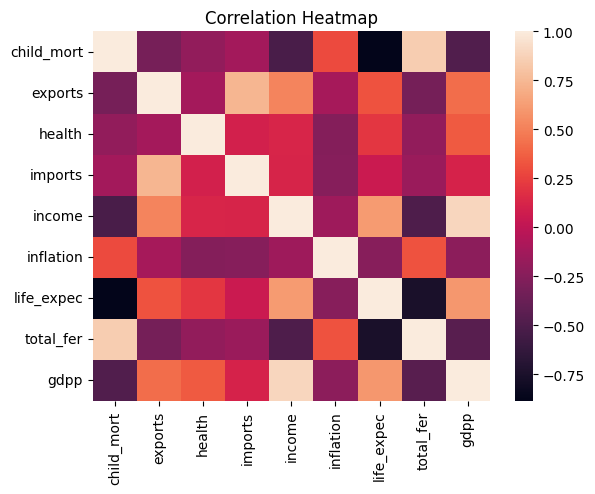

In [85]:
# Creating correlation heatmap using seaborn. 
correlation = df.corr()

sns.heatmap(correlation)
plt.title("Correlation Heatmap")
plt.show()

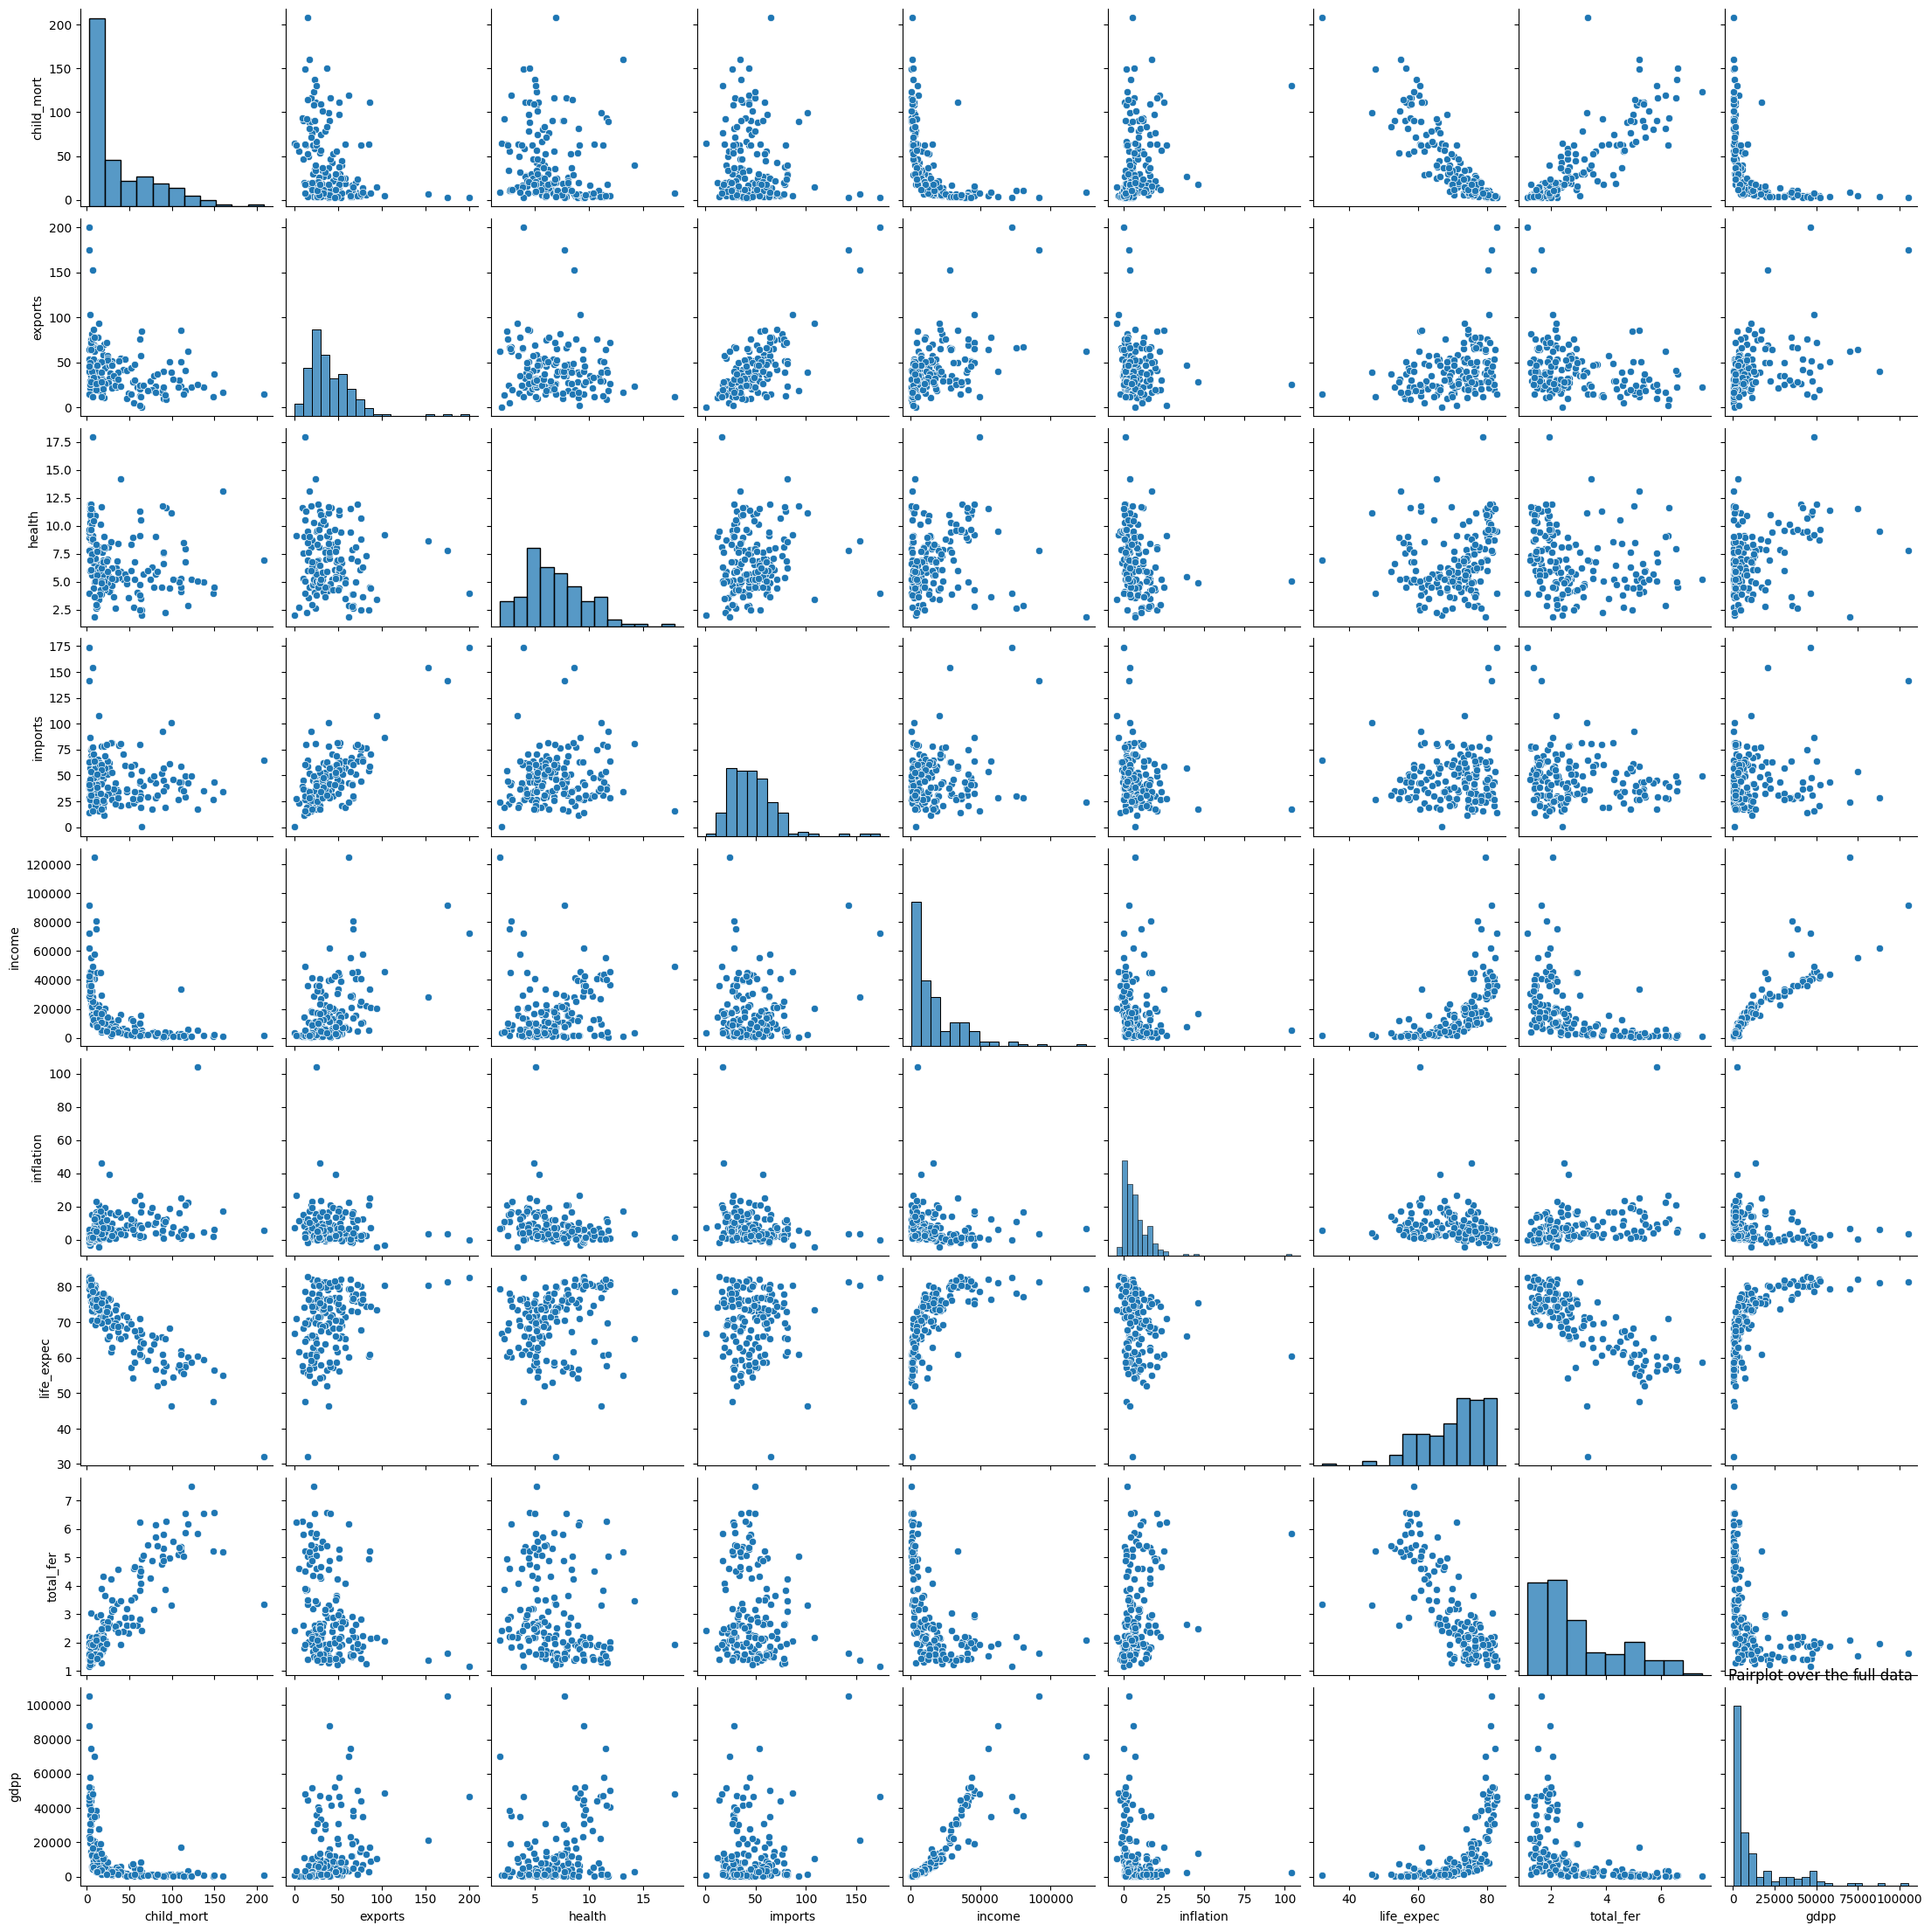

In [84]:
sns.pairplot(df)
plt.title("Pairplot over the full data")
plt.show()

# TODO: observations of the plots

### Modeling

In [34]:
# Creating StandardScaler() object
scaler = StandardScaler()

# Fit the scaler to the data. 
scaler.fit(df)

# Transform the data and store in new DataFrame
df_scaled = pd.DataFrame(scaler.transform(df))

In [35]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [67]:
# Defining empty dict to store the cluster results for different numbers of clusters
cluster_runs = {}

# Looping from 2 to 10 n_clusters
for n in range(2, 11):
    cluster = KMeans(n_clusters=n).fit(df_scaled)
    cluster_runs[n] = cluster.labels_

In [68]:
print(cluster_runs[2])

[0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0]


In [69]:
# Defining empty dict to store the silhouette scores for each run. 
silhouettes = {}

# Looping over the cluster runs and find the silhouette scores. 
for key in cluster_runs.keys():
    score = silhouette_score(df_scaled, cluster_runs[key])
    silhouettes[key] = score
    print(f"For {key} clusters: {score}")

For 2 clusters: 0.28735668921406704
For 3 clusters: 0.28329575683463126
For 4 clusters: 0.2959517057752815
For 5 clusters: 0.3060544006436598
For 6 clusters: 0.22799367131601095
For 7 clusters: 0.24734193648049102
For 8 clusters: 0.24336220516947285
For 9 clusters: 0.24467948269468612
For 10 clusters: 0.21288939699116952


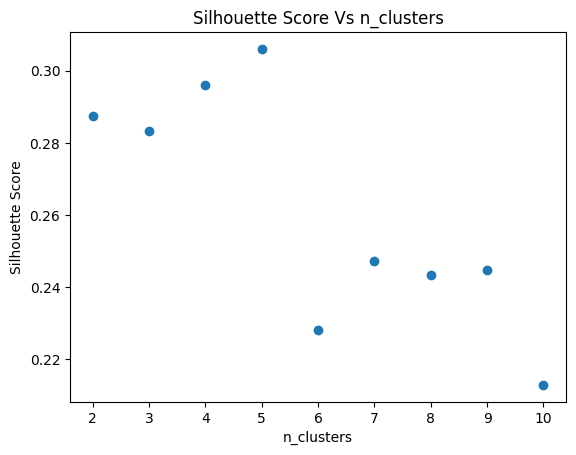

In [83]:
plt.scatter(silhouettes.keys(), silhouettes.values())
plt.title("Silhouette Score Vs n_clusters")
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Score")
plt.show()

5 Clusters give the best silhouette score for this use case. 

### Conclusion
TODO

In [103]:
chosen_n_cluster = 5

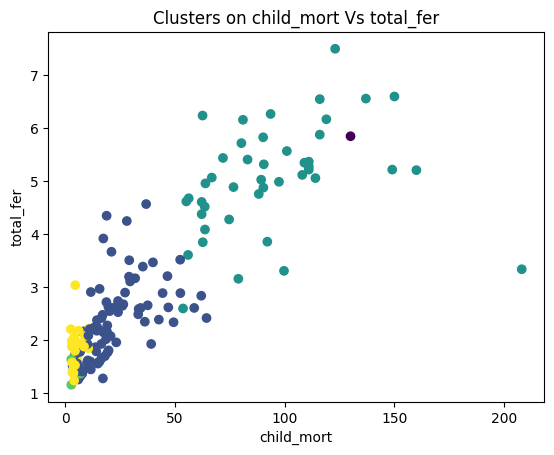

In [104]:
plt.scatter(df['child_mort'], df['total_fer'], c=cluster_runs[chosen_n_cluster], label=range(5))
plt.title("Clusters on child_mort Vs total_fer")
plt.xlabel("child_mort")
plt.ylabel("total_fer")
plt.show()

TODO

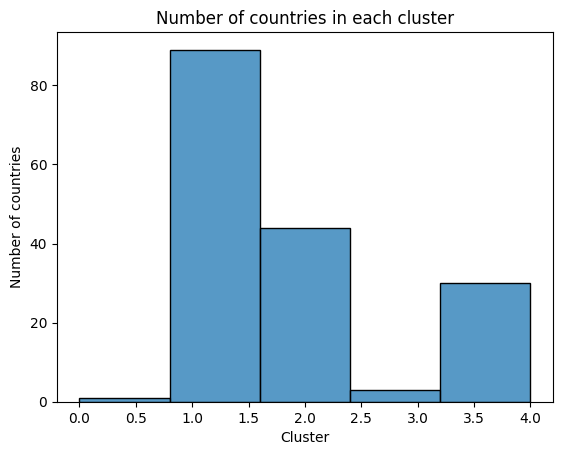

In [105]:
sns.histplot(cluster_runs[chosen_n_cluster], bins = chosen_n_cluster)

plt.title("Number of countries in each cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of countries")
plt.show()